# Upload and Prepare Phenotype Model

In [23]:
import pandas as pd
import numpy as np

In [2]:
print("Enter the phenotype:")
phenotype = input()

print("Enter the MONDO id:")
mondoId = input()

Enter the phenotype:


 type2diabetes


Enter the MONDO id:


 MONDO_0005148


In [ ]:
!mkdir {phenotype}
!mkdir {phenotype}/model
!pgscatalog-download --efo {mondoId} -b GRCh37 -o {phenotype}/model

In [17]:
samples = !ls {phenotype}/model
samplesList = phenotype + "/model/" + (" " + phenotype + "/model/").join(samples)
samplesList

'type2diabetes/model/PGS000020_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000031_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000032_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000033_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000036_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000125_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000712_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000713_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000729_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000804_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000805_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000806_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000807_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000808_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000832_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000848_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000849_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000850_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000851_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000852_hmPOS_GRCh37.txt.gz

In [19]:
!pgscatalog-combine -s {samplesList} -t GRCh37 -o {phenotype}/combined.txt

  0%|                                                    | 0/79 [00:00<?, ?it/s]pgscatalog.core.lib._normalise: 2024-04-18 01:42:28 WARNING  Multiple other_alleles detected in 16 variants
pgscatalog.core.lib._normalise: 2024-04-18 01:42:28 WARNING  Other allele for these variants is set to missing
pgscatalog.core.lib._normalise: 2024-04-18 01:42:28 WARNING  Multiple other_alleles detected in 5 variants
pgscatalog.core.lib._normalise: 2024-04-18 01:42:28 WARNING  Other allele for these variants is set to missing
pgscatalog.core.lib._normalise: 2024-04-18 01:42:28 WARNING  Multiple other_alleles detected in 1 variants
pgscatalog.core.lib._normalise: 2024-04-18 01:42:28 WARNING  Other allele for these variants is set to missing
 13%|█████▍                                     | 10/79 [00:30<05:35,  4.87s/it]pgscatalog.core.lib._normalise: 2024-04-18 01:42:58 WARNING  4 bad variants
pgscatalog.core.lib._normalise: 2024-04-18 01:42:58 WARNING  4 bad variants
pgscatalog.core.lib._normalise: 2

In [20]:
!wc -l {phenotype}/combined.txt

 18218735 type2diabetes/combined.txt


In [49]:
print('head')
!head {phenotype}/combined.txt
print('tail')
!tail {phenotype}/combined.txt

head
chr_name	chr_position	effect_allele	other_allele	effect_weight	effect_type	is_duplicated	accession	row_nr
10	114758349	T	C	0.353	additive	False	PGS000020	0
6	20679709	G	A	0.164	additive	False	PGS000020	1
16	53803574	A	T	0.126873	additive	False	PGS000020	2
8	118185025	A	G	-0.139	additive	False	PGS000020	3
3	185511687	T	G	0.128871	additive	False	PGS000020	4
10	94462882	T	C	-0.112322	additive	False	PGS000020	5
9	22137685	G	T	0.139854	additive	False	PGS000020	6
4	6303022	C	T	-0.1029	additive	False	PGS000020	7
2	227093585	A	C	-0.0983	additive	False	PGS000020	8
tail
22	44379565	C	G	0.06765864847381486	additive	False	PGS003402	6828
22	45680473	G	A	0.04879016416943205	additive	False	PGS003402	6829
22	47716781	C	T	0.02955880224154443	additive	False	PGS003402	6830
22	48816291	G	C	0.08617769624105241	additive	False	PGS003402	6831
22	48817460	C	T	0.08617769624105241	additive	False	PGS003402	6832
22	48819677	T	A	0.08617769624105241	additive	False	PGS003402	6833
22	48821349	G	C	0.08617769624105

In [24]:
combined_weights = pd.read_csv(phenotype + '/combined.txt', delimiter="\t")
combined_weights

/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_42731/3016281645.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_weights = pd.read_csv(phenotype + '/combined.txt', delimiter="\t")


,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr
0,10,114758349.0,T,C,0.353000,additive,False,PGS000020,0
1,6,20679709.0,G,A,0.164000,additive,False,PGS000020,1
2,16,53803574.0,A,T,0.126873,additive,False,PGS000020,2
3,8,118185025.0,A,G,-0.139000,additive,False,PGS000020,3
4,3,185511687.0,T,G,0.128871,additive,False,PGS000020,4
...,...,...,...,...,...,...,...,...,...
18218729,22,48819677.0,T,A,0.086178,additive,False,PGS003402,6833
18218730,22,48821349.0,G,C,0.086178,additive,False,PGS003402,6834
18218731,22,48821854.0,A,G,0.086178,additive,False,PGS003402,6835
18218732,22,48823666.0,T,C,0.086178,additive,False,PGS003402,6836


In [205]:
combined_weights_reduced = combined_weights.sort_values('effect_weight',key=abs,ascending=False).head(int(len(combined_weights) * 0.1))
combined_weights_reduced.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_weights_reduced = combined_weights_reduced.dropna(subset=['chr_name', 'chr_position'])
combined_weights_reduced['chr_position'] = combined_weights_reduced['chr_position'].astype(int)
combined_weights_reduced

,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr
8205860,8,110552252,G,T,-5.484162,additive,False,PGS002426,2032
8215824,8,110552252,G,T,-5.484162,additive,False,PGS002475,8049
8270109,8,110552252,G,T,-5.484162,additive,False,PGS002524,46059
8205874,8,110551664,T,C,-5.307112,additive,False,PGS002426,2046
8215838,8,110551664,T,C,-5.307112,additive,False,PGS002475,8063
...,...,...,...,...,...,...,...,...,...
1368,7,10516229,A,G,0.009246,additive,False,PGS000020,1368
8302304,15,41799711,C,T,-0.009246,additive,False,PGS002524,78254
7856818,10,94473629,G,A,0.009246,additive,False,PGS002379,573920
8277939,9,4160746,C,T,-0.009245,additive,False,PGS002524,53889


In [206]:
cols = ['chr_name', 'chr_position']

combined_weights_reduced['chr_coordinate'] = combined_weights_reduced[cols].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
combined_weights_reduced = combined_weights_reduced.drop_duplicates(subset=['chr_coordinate'], keep='first')
combined_weights_reduced

,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr,chr_coordinate
8205860,8,110552252,G,T,-5.484162,additive,False,PGS002426,2032,8:110552252
8205874,8,110551664,T,C,-5.307112,additive,False,PGS002426,2046,8:110551664
8218222,11,113370891,A,G,3.925090,additive,False,PGS002475,10447,11:113370891
8207008,14,24952289,C,T,-3.891308,additive,False,PGS002426,3180,14:24952289
8205516,7,99849572,G,C,-3.780482,additive,False,PGS002426,1688,7:99849572
...,...,...,...,...,...,...,...,...,...,...
8258899,6,135653357,A,G,0.009247,additive,False,PGS002524,34849,6:135653357
8269616,7,74394404,A,C,-0.009246,additive,False,PGS002524,45566,7:74394404
8258908,6,76560613,GA,G,0.009246,additive,False,PGS002524,34858,6:76560613
1368,7,10516229,A,G,0.009246,additive,False,PGS000020,1368,7:10516229


# Prepare dataset

In [54]:
import xml.etree.ElementTree as et
import requests

## Type 2 diabetes

Open access data from OpenSNP

https://opensnp.org/phenotypes/50

### Fasting glucose without meds:

Normal=<6.1 (<110)mmol/l(mg/dl)

Impaired fasting glycaemia=≥ 6.1(≥110) & <7.0(<126)mmol/l(mg/dl)

Impaired glucose tolerance=<7.0 (<126)mmol/l(mg/dl)

Diabetes mellitus [T2D]=≥7.0 (≥126)mmol/l(mg/dl)

### Known Phenotypes:


No = no

Normal = no

No, but genetically predisposed = almost

Diabetes mellitus [t2d] = yes

R1b1a2a1a1a4 - useless, will be reduced

Prediabetic = almost

Gestational diabetes = almost

Gestational diabetic and now type ii = yes

No. i have type 1 diabetes = almost

Rs7903146 = almost

Havent a clue - useless, will be reduced

Yes = yes

118 mg/dl = almost

In [92]:
phenotypes = {
    'useless': ['r1b1a2a1a1a4', 'havent a clue'],
    'yes': ['diabetes mellitus [t2d]', 'gestational diabetic and now type ii', 'yes'],
    'no': ['no', 'normal'],
    'almost': ['no, but genetically predisposed', 'prediabetic', 'gestational diabetes', 'no. i have type 1 diabetes', 'rs7903146', '118 mg/dl']
}

def which_phenotype(variant):
    if variant in phenotypes.get('yes'):
        return 'yes'
    elif variant in phenotypes.get('no'):
        return 'no'
    elif variant in phenotypes.get('almost'):
        return 'almost'
    else:
        return 'useless'

Many people uploaded data from AncestryDNA

https://www.ancestry.com/dna/en/legal/international/faq

In [51]:
print('Enter openSNP phenotype id:')
open_snp_id = input()

Enter openSNP phenotype id:


 50


In [67]:
url = "https://opensnp.org/phenotypes/" + open_snp_id + '/rss'

root = et.fromstring(requests.get(url).content)

xml_samples = [[item.find('dlink').text, item.find('variation').text.strip().lower()] for item in root.findall('./channel/item')]

xml_samples

[['http://opensnp.org/data/12349.ancestry.10184',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/12299.23andme.10131', 'no'],
 ['http://opensnp.org/data/12274.23andme.10108', 'rs7903146'],
 ['http://opensnp.org/data/12258.23andme.10097', 'no'],
 ['http://opensnp.org/data/12078.ftdna-illumina.9947',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/12049.23andme.9908',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/11698.23andme.9613', 'no'],
 ['http://opensnp.org/data/11531.23andme.9422', 'no'],
 ['http://opensnp.org/data/11499.ancestry.9392', 'no. i have type 1 diabetes'],
 ['http://opensnp.org/data/11396.ancestry.9318',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/10632.23andme.9278', '118 mg/dl'],
 ['http://opensnp.org/data/10507.23andme.8778', 'diabetes mellitus [t2d]'],
 ['http://opensnp.org/data/10469.23andme.8739', 'no'],
 ['http://opensnp.org/data/9992.23andme.8254',
  'gestational diabetic and now type ii']

In [74]:
samples_df = pd.DataFrame(xml_samples, columns=['dlink', 'variant'])
samples_df

,dlink,variant
0,http://opensnp.org/data/12349.ancestry.10184,"no, but genetically predisposed"
1,http://opensnp.org/data/12299.23andme.10131,no
2,http://opensnp.org/data/12274.23andme.10108,rs7903146
3,http://opensnp.org/data/12258.23andme.10097,no
4,http://opensnp.org/data/12078.ftdna-illumina.9947,"no, but genetically predisposed"
...,...,...
217,http://opensnp.org/data/80.23andme.41,no
218,http://opensnp.org/data/60.23andme.27,no
219,http://opensnp.org/data/42.23andme.18,normal
220,http://opensnp.org/data/1.23andme.9,normal


In [72]:
!mkdir {phenotype}/no
!mkdir {phenotype}/yes
!mkdir {phenotype}/almost

mkdir: type2diabetes/no: File exists
mkdir: type2diabetes/yes: File exists


In [99]:
def count_effect_alleles(row):
    ctr = 0
    if row['allele1'] == row['effect_allele']:
        ctr += 1
    if row['allele2'] == row['effect_allele']:
        ctr += 1
    return ctr

In [112]:
def is_known_file_format(dlink):
    dlink = dlink.lower()
    return '.ancestry.' in dlink or '.23andme.' in dlink

In [148]:
def filename(dlink):
    return sample[1].split('/')[-1]

In [153]:
combined_weights_reduced

,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr,chr_coordinate
8205860,8,110552252,G,T,-5.484162,additive,False,PGS002426,2032,8:110552252
8215824,8,110552252,G,T,-5.484162,additive,False,PGS002475,8049,8:110552252
8270109,8,110552252,G,T,-5.484162,additive,False,PGS002524,46059,8:110552252
8205874,8,110551664,T,C,-5.307112,additive,False,PGS002426,2046,8:110551664
8215838,8,110551664,T,C,-5.307112,additive,False,PGS002475,8063,8:110551664
...,...,...,...,...,...,...,...,...,...,...
73569,6,69616292,A,C,-0.070500,additive,False,PGS000036,65975,6:69616292
84704,7,75523450,A,G,-0.070500,additive,False,PGS000036,77110,7:75523450
19789,1,235520685,T,C,-0.070500,additive,False,PGS000036,12195,1:235520685
32964,2,211905271,A,G,-0.070500,additive,False,PGS000036,25370,2:211905271


In [207]:
cols = ['chromosome', 'position']

sample = 0
data = 0
row = 0
new_df = 0
new_ds_row = 0
new_df = 0
accumulated_columns = combined_weights_reduced['chr_coordinate']
accumulator = []
variants_col = []
filenames_col = []

for sample in samples_df.head(10).itertuples():
    if sample[2] not in phenotypes.get('useless') and is_known_file_format(sample[1]):
        data = pd.read_csv(sample[1], comment='#', delimiter="\t")
        if '23andme' in sample[1].lower():
            data.columns = ['rsid', 'chromosome', 'position', 'alleles']
            data['allele1'] = data['alleles'].astype(str).str[0]
            data['allele2'] = data['alleles'].astype(str).str[1]
            data = data.drop(columns=['alleles'])
        else:
            data.columns = ['rsid', 'chromosome', 'position', 'allele1', 'allele2']
        
        data['chr_coordinate'] = data[cols].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
        data.to_csv(phenotype + '/' + which_phenotype(sample[2]) + '/' + filename(sample[1]), index=False)
        
        new_df = combined_weights_reduced.merge(data, on='chr_coordinate', how='left').fillna(0)
        new_df['effect_alleles_count'] = new_df.apply(count_effect_alleles, axis=1)
        new_df = new_df.sort_values(['effect_weight', 'effect_alleles_count'], ascending=[False, False]).drop_duplicates(subset=['chr_coordinate'], keep='first')

        accumulator.append(new_df['effect_alleles_count'].values)
        variants_col.append(which_phenotype(sample[2]))
        filenames_col.append(filename(sample[1]))

print(variants_col)
print(filenames_col)
accumulator

/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_42731/2847853178.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")
/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_42731/2847853178.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")
/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_42731/2847853178.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")
/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_42731/2847853178.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")
/var/folders/3f/_81l_gq1

['almost', 'no', 'almost', 'no', 'almost', 'no', 'no', 'almost', 'almost']
['12349.ancestry.10184', '12299.23andme.10131', '12274.23andme.10108', '12258.23andme.10097', '12049.23andme.9908', '11698.23andme.9613', '11531.23andme.9422', '11499.ancestry.9392', '11396.ancestry.9318']


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [208]:
dataset = pd.DataFrame(accumulator)
dataset.columns = accumulated_columns
dataset['variant'] = variants_col
dataset['filename'] = filenames_col
dataset

chr_coordinate,8:110552252,8:110551664,11:113370891,14:24952289,7:99849572,7:99849128,7:99843773,8:110558995,7:99840998,7:99835754,...,14:106493458,22:43800070,19:42107415,6:135653357,7:74394404,6:76560613,7:10516229,9:4160746,variant,filename
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,almost,12349.ancestry.10184
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no,12299.23andme.10131
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,almost,12274.23andme.10108
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no,12258.23andme.10097
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,almost,12049.23andme.9908
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no,11698.23andme.9613
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no,11531.23andme.9422
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,almost,11499.ancestry.9392
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,almost,11396.ancestry.9318


# PRS Linear Model Prediction

In [212]:
import matplotlib.pyplot as plt

In [209]:
def weighted_linear_model(row):
    return(row.reset_index(drop=True).multiply(combined_weights_reduced['effect_weight'].reset_index(drop=True))).sum()

In [210]:
dataset['linear_prs'] = dataset.drop(['variant', 'filename'], axis=1).apply(weighted_linear_model, axis=1)
dataset

chr_coordinate,8:110552252,8:110551664,11:113370891,14:24952289,7:99849572,7:99849128,7:99843773,8:110558995,7:99840998,7:99835754,...,22:43800070,19:42107415,6:135653357,7:74394404,6:76560613,7:10516229,9:4160746,variant,filename,linear_prs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,almost,12349.ancestry.10184,-41.569286
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,no,12299.23andme.10131,-1.446872
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,almost,12274.23andme.10108,-71.845039
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,no,12258.23andme.10097,39.223531
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,almost,12049.23andme.9908,7.336859
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,no,11698.23andme.9613,17.082242
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,no,11531.23andme.9422,27.217223
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,almost,11499.ancestry.9392,-9.697290
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,almost,11396.ancestry.9318,-61.099605


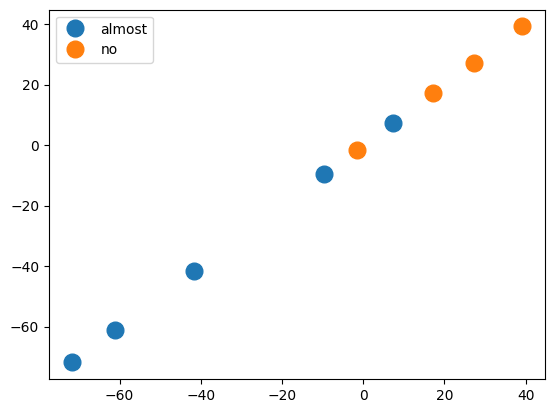

In [226]:
groups = dataset.groupby('variant')

for name, group in groups:
    plt.plot(group['linear_prs'], group['linear_prs'], marker='o', linestyle='', markersize=12, label=name)

plt.legend()